# Introducción al numpy con aplicación  a las señales de audio

## Slicing
En este  ejercicio  veremos:
* Cómo acceder a partes de una matriz mediante *slicing* de numpy

La mecánica que seguiremos será visualizar con ejemplos pequeños la operación a realizar, para luego aplicarsela a la señal de audio.

In [1]:
#Importaremos los módulos necesarios
%matplotlib inline
import sys
sys.path.append('.')
import numpy as np
import upv_audio
import matplotlib
import matplotlib.pyplot as plt
# En este cuaderno veremos la opción inline, para ir variando
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from IPython.display import Audio

import UPVlog

notebook_filename="02-slicing"
mylogger=UPVlog.UPVlog(notebook_filename)

In [2]:
fs1,x1=upv_audio.read('audios/numeros.wav')
fs2,x2=upv_audio.read('audios/Xiaomi.wav')

Como uno de los ficheros es mono y el otro stereo, habremos te tener cierta precaución a la hora de llamar a las funciones de numpy.

## Seleccionar un fragmento conocido el rango de muestras
De la señal de los números seleccionaremos la segunda palabra.

Primero haremos un plot para saber el rango de muestras. 

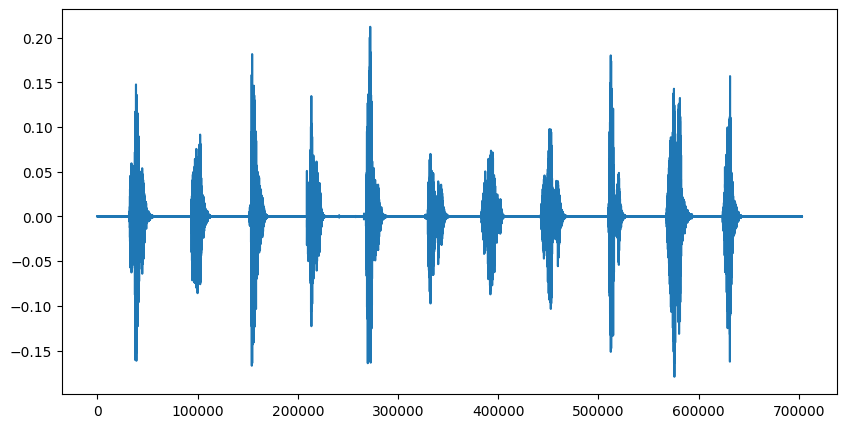

In [3]:
_=plt.plot(x1)


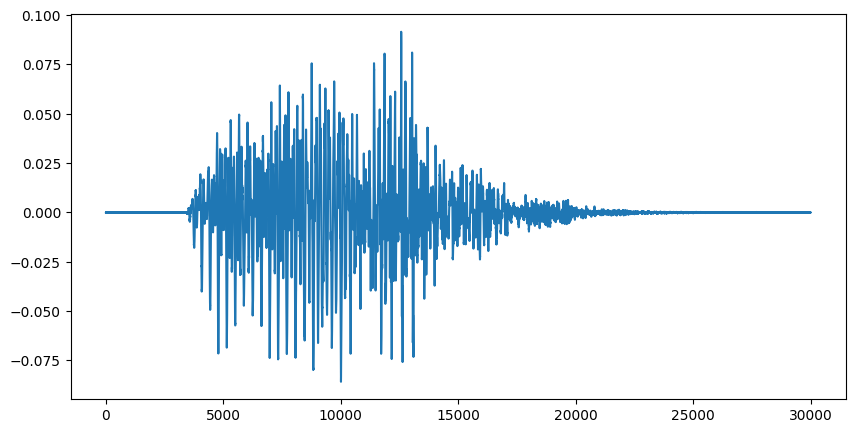

In [4]:
# Seleccionar la segunda palabra
n1=None
n2=None
segundapalabra=None
### BEGIN SOLUTION
n1=90000
n2=120000
segundapalabra=x1[n1:n2]
### END SOLUTION

if segundapalabra is not None:
    _=plt.plot(segundapalabra)




In [5]:
# Comprobación
### BEGIN TESTS
mylogger.log("Testing Seleccionar por muestras")
assert n1 is not None and n2 is not None and segundapalabra is not None
assert n1>55000 and n1 < 95000, "n1 no es correcto"
assert n2>n1, "el final debe ser mayor que el inicio"
assert n2<500000
assert type(segundapalabra)==type(np.zeros(3))
mylogger.log( "Success Testing Seleccionar por muestras")
### END TESTS

# Hay otros tests ocultos con los que se le evaluará

### BEGIN HIDDEN TESTS
assert n1 is not None and n2 is not None and segundapalabra is not None
assert n1>55000 and n1 < 95000, "n1 no es correcto"
assert n2>110000 and n2 < 150000, "n2 no es correcto"

### END HIDDEN TESTS

## Coger la primera mitad de una señal

Recordemos que la duración de una señal en muestras es el valor de shape[0]

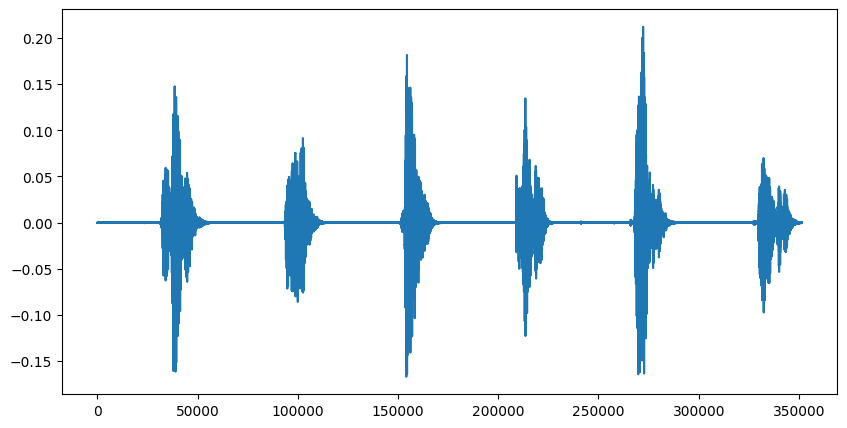

In [6]:
#Senyal Mono Quedarse con la primera mitad de x1
primera_mitad=None
### BEGIN SOLUTION
dur1_mues = x1.shape[0] 
duracion_mitad=int(dur1_mues//2)
primera_mitad=x1[:duracion_mitad]
_=plt.plot(primera_mitad) # Lo de poner _= es simplemente para evitar que salga un mensaje "feo"
### END SOLUTION


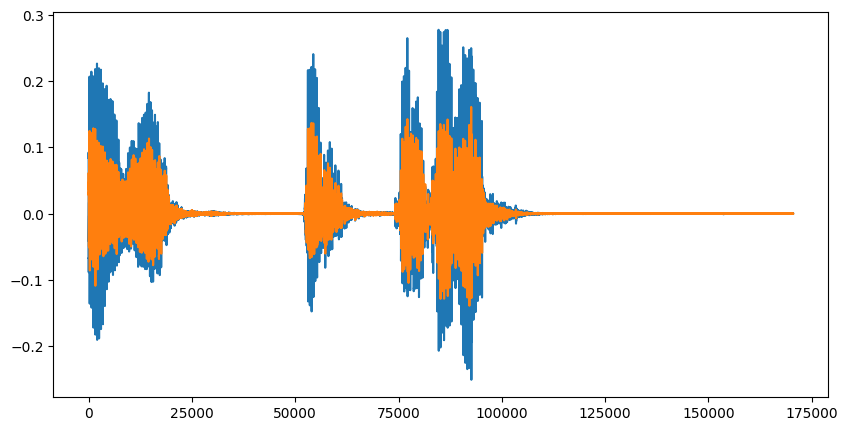

In [7]:
#Senyal Stereo. Obtener la segunda mitad de x2
segunda_mitad = None

### BEGIN SOLUTION
dur2_mues = x2.shape[0] 
mitad_dur2=dur2_mues//2 #División entera
segunda_mitad=x2[mitad_dur2:]
### END SOLUTION
_=plt.plot(segunda_mitad)


In [8]:
#Comprobación por el estudiante de que el resultado es correcto antes de enviarlo

### BEGIN TESTS
mylogger.log( "Testing Coger Segunda Mitad")
assert segunda_mitad is not None, "Segunda mitad stereo es None"
assert segunda_mitad.shape==(x2.shape[0]-x2.shape[0]//2,x2.shape[1]), "No tiene la duración adecuada"
mylogger.log( "Success Testing Coger Segunda Mitad")
### END TESTS

# Hay otras comprobaciones ocultas que se ejecutan en la corrección automática
### BEGIN HIDDEN TESTS

s_dur2_mues = x2.shape[0] 
s_mitad_dur2=s_dur2_mues//2 #División entera
s_segunda_mitad=x2[s_mitad_dur2:]
assert s_segunda_mitad.shape == segunda_mitad.shape, "No tiene el tamaño adecuado"
assert np.all(segunda_mitad == s_segunda_mitad)
### END HIDDEN TESTS



### Programar una función que devuelva las dos mitades de una señal
Programar una función que devuelva las dos mitades de una señal sea esta mono o estéreo.

La función recibe como entrada :
* Una señal mono o stereo

Devuelve:

* Una tupla de dos elementos que sean la primera mitad y la segunda

**NOTA:** Si la señal tiene un númer impar de muestras, por ejemplo 11 muestras, la primera mitad tendrá 5 muestras y la segunda 6

In [9]:
def mitades(x):
    ''' Devuelve las dos mitades de una senyal
    Debe funcionar tanto con mono como con stereo'''
    primera_mitad=None
    segunda_mitad=None
    
    ### BEGIN SOLUTION
    d=x.shape[0]
    d2= d//2
    if x.ndim ==1: #caso MONO
        primera_mitad =x[:d2]
        segunda_mitad =x[d2:]
    else: #caso ESTEREO
        primera_mitad =x[:d2,:]
        segunda_mitad =x[d2:,:]
    ### END SOLUTION
    
    return primera_mitad,segunda_mitad

In [10]:
# Comprobaciones en clase




In [11]:
# Celda para corrección automática
### BEGIN HIDDEN TESTS
np.random.seed(2)
xmono=np.random.rand(500)
xstereo_impar=np.random.rand(501,2)
xstereo_par=np.random.rand(150,2)

### AUTOTEST mitades(xmono)
### AUTOTEST mitades(xstereo_impar)
### AUTOTEST mitades(xstereo_par)
### END HIDDEN TESTS

## Quedarse con un canal de la señal stereo
El canal izquierdo es el de índice 0, y el derecho el de índice 1

In [12]:
## Obtener el canal izquierdo de x2

canalL=None 
### BEGIN SOLUTION
canalL=x2[:,0]
### END SOLUTION
print(canalL.shape)

(340992,)


In [13]:
# Celda de auto auto-corrección
# Compruebe que no da errores

### BEGIN TESTS
mylogger.log("Testing Coger CanalL")
assert canalL is not None," No se ha determinado el valor de canalL"
assert len(canalL.shape)==1, "La señal de un canal tiene que tener shape (N,)"
assert len(canalL)==x2.shape[0],"La duracion de canalL no es correcta"
mylogger.log("Success Testing Coger CanalL")
### END TESTS

El resultado solo tiene una dimensión.

**NOTA**
Al seleccionar una columna (o una fila), se reduce el número de dimensiones en 1

**NO es lo mismo** un ndarray de 1 dimensión que un ndarray de 2 dimensiones en los que 1 de las dimensiones tenga un elemento.

En el caso siguiente, se selecciona la columna con una tupla de un elemento. Obsérvese la diferencia en el tamaño del resultado

In [14]:
# Obtener el canal L como un array de shape  (N,1)
canalL=None 
### BEGIN SOLUTION
canalL=x2[:,(0,)]
### END SOLUTION
print(canalL.shape)

(340992, 1)


In [15]:
# Celda de comprobación por el estudiante. Para que la corrección automática le de su respuesta como buena esta celda no debe dar errores
### BEGIN TESTS
mylogger.log( "Testing Coger Canal L shape(N,1)")
assert canalL is not None," No se ha determinado el valor de canalL"
assert len(canalL.shape)==2, "La señal pedida debe  tener shape (N,1)"
assert canalL.shape[1]==1, "La señal pedida debe  tener shape (N,1)"
mylogger.log( "Success Testing Coger Canal L shape(N,1)")
### END TESTS


## Seleccionar fragmentos con índices negativos
Usando índices negativos Veremos cómo:
* Quitar las últimas mil muestras de una señal
* Quedarse con las mil últimas muestras de una señal

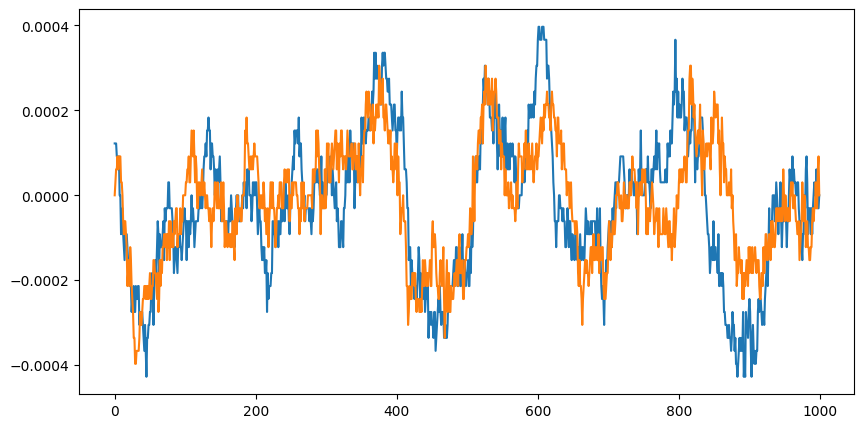

In [16]:
# Coger las mil últimas muestras de una señal stereo

# Obtener las 1000 últimas muestras de la señal x2
ultimas1000=None
### BEGIN SOLUTION
ultimas1000=x2[-1000:,:]# Ambos canales
### END SOLUTION

_=plt.plot(ultimas1000) #

In [17]:
# Celda de para corrección automática . No escribir nada
### BEGIN TESTS
mylogger.log( "Testing Coger Ultimas 1000")
assert ultimas1000 is not None, "ultimas1000 no rellenado"
assert ultimas1000.shape ==(1000,2), "ultimas1000 no tienen el tamaño correcto"
assert np.all(ultimas1000[-1,:]==x2[-1,:]), "ultimas1000 tienen el tamaño correcto pero no las muestras correctas"
mylogger.log( "Success Testing Coger Ultimas 1000")
### END TESTS

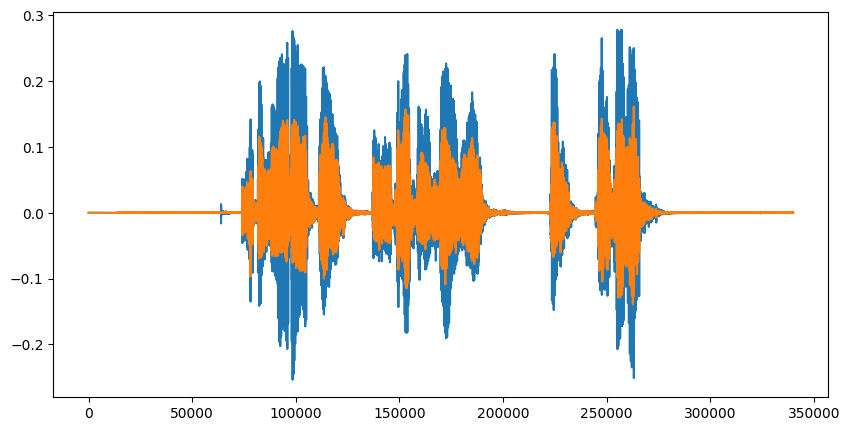

In [18]:
# Tomar todas las muestras menos las 1000 últimas de x2 (stereo)

todas_menos_ultimas_1000=None
### BEGIN SOLUTION
todas_menos_ultimas_1000=x2[:-1000,:]# Ambos canales
### END SOLUTION

_=plt.plot(todas_menos_ultimas_1000)

In [19]:
# Celda para verificación por el estudiante previa al envío.
# Si no hay errores, probablemente su respuesta sea correcta
### BEGIN TESTS
mylogger.log( "Testing Coger Todas menos Ultimas 1000")
assert todas_menos_ultimas_1000 is not None, "No se ha rellenado nada en todas_menos_ultimas_1000"
assert todas_menos_ultimas_1000.shape==(x2.shape[0]-1000,2), "El tamaño de todas_menos_ultimas_1000 no es correcto"
assert np.all(todas_menos_ultimas_1000[0,:]==x2[0,:]),"El tamaño de todas_menos_ultimas_1000 no es correcto"
mylogger.log( "Success Testing Coger Todas menos Ultimas 1000")
### END TESTS

## Seleccionar muestras alternas
En este apartado veremos:
* Cómo quedarse con una muestra de cada M (diezmado)
* Cómo insertar (L-1) ceros entre cada muestra original

In [20]:
def diezma(x,factor):
    '''
    x: Vector unidimensional
    factor: tomar 1 de cada factor empezando por la primera
    '''
    y = None
    ### BEGIN SOLUTION
    y=x[::factor]
    ### END SOLUTION
    return y
    


In [21]:
# ***** Verificar que hace lo que se supone que debe hacer****
t=np.arange(13)+1
d_diez3 = diezma(t,3) #una de cada 3 muestras
print(t,'\n',d_diez3)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13] 
 [ 1  4  7 10 13]


El resultado debería ser algo así cuando factor==3:

<img src="imagenes/diezmado.png" alt="diezmado" width="400"/>


In [22]:
#Celda de corrección automática. No escribir en ella
### BEGIN TESTS
mylogger.log( "Testing diezma()")
t=np.arange(17)+1
d_diez4 = diezma(t,4)
assert d_diez4 is not None,"No se ha implementado la función diezma"
previsto=np.arange(1,18,4)
assert len(previsto)==len(d_diez4),"El tamaño de la salida no es el correcto en diezma"
assert np.all(d_diez4==previsto), "El resultado no es correcto en la funcion diezma"
mylogger.log( "Success Testing diezma()")
### END TESTS

### BEGIN HIDDEN TESTS
np.random.seed(2)
kk=np.random.rand(101)
mm=np.random.rand(100)
nn=np.random.rand(102)
### AUTOTEST diezma(kk,2)
### AUTOTEST diezma(kk,3)
### AUTOTEST diezma(kk,4)
### AUTOTEST diezma(mm,2)
### AUTOTEST diezma(nn,3)
### AUTOTEST diezma(mm,4)
### END HIDDEN TESTS

In [23]:
def inserta_ceros(x,factor):
    '''
    x: Señal de audio. Puede ser mono y stereo
    factor: insertar (factor -1) ceros tras cada muestra    
    El resultado esperado debe ser algo así
    x: [ 1  4  7 10 13] 
    salida: [ 1.  0.  0.  4.  0.  0.  7.  0.  0. 10.  0.  0. 13.  0.  0.]
    '''
    # Para insertar ceros, primero crearemos un vector de 0s tamaño igual al tamaño inicial por factor.
    # Luego pondremos las muestras en su sitio

    y = None
    ### BEGIN SOLUTION
    nmues=x.shape[0]
    if x.ndim==1: #es MONO
        y=np.zeros(nmues*factor)
        y[::factor]=x
    else: #tiene más de 1 canal
        y=np.zeros((nmues*factor,x.shape[1]))
        y[::factor,:]=x
    ### END SOLUTION
    return y
    


In [24]:
################ COMPROBACION POR EL ESTUDIANTE ###############

### BEGIN TESTS
mylogger.log( "Testing inserta_ceros()")
x=np.random.randint(low=2,high=10,size=5)
xs=np.random.randint(low=2,high=10,size=(3,2))
i2=inserta_ceros(x,2)
i3=inserta_ceros(x,3)

assert i2 is not None and i3 is not None, "Función inserta ceros sin completar"
assert i2.shape[0]==x.shape[0]*2, "Función inserta ceros incorrecta"
assert i3.shape[0]==x.shape[0]*3, "Función inserta ceros incorrecta"

print(" ******* Pruebas Mono ********")
print('x:',x)
print('i2:',i2)
print('i3:',i3)
print(" ******* Pruebas Stereo ********")
i3s=inserta_ceros(xs,3)
i2s=inserta_ceros(xs,2)      

assert i2s is not None and i3s is not None, "Función inserta ceros sin completar"
assert i2s.shape[0]==xs.shape[0]*2, "Función inserta ceros incorrecta para stereo"
assert i3s.shape[0]==xs.shape[0]*3, "Función inserta ceros incorrecta para stereo"
assert i2s.shape[1] == xs.shape[1], "Función inserta ceros incorrecta para stereo"
assert i3s.shape[1] == xs.shape[1], "Función inserta ceros incorrecta para stereo"

mylogger.log( "Success Testing inserta_ceros()")
### END TESTS
print('xs:',xs)
print('i2s:',i2s)
print('i3s:',i3s)

### BEGIN HIDDEN TESTS
np.random.seed(2)
kk=np.random.rand(101)

### AUTOTEST inserta_ceros(kk,2)
### AUTOTEST inserta_ceros(kk,4)

kks=np.random.rand(300,2)
### AUTOTEST inserta_ceros(kks,3)
### AUTOTEST inserta_ceros(kks,7)

### END HIDDEN TESTS


 ******* Pruebas Mono ********
x: [9 7 9 3 2]
i2: [9. 0. 7. 0. 9. 0. 3. 0. 2. 0.]
i3: [9. 0. 0. 7. 0. 0. 9. 0. 0. 3. 0. 0. 2. 0. 0.]
 ******* Pruebas Stereo ********
xs: [[4 6]
 [6 3]
 [3 4]]
i2s: [[4. 6.]
 [0. 0.]
 [6. 3.]
 [0. 0.]
 [3. 4.]
 [0. 0.]]
i3s: [[4. 6.]
 [0. 0.]
 [0. 0.]
 [6. 3.]
 [0. 0.]
 [0. 0.]
 [3. 4.]
 [0. 0.]
 [0. 0.]]


___________________________

La celda anterior debería imprimir lo siguiente. 


<img src="imagenes/insceros.png" alt="diezmado" width="400"/>

Compruebe que tanto para las señales stereo como mono el resultado coincide

## Inversión del orden temporal
En este apartado se muestra cómo hacer una señal de audio irreconocible de modo que solo una persona con programas "no-standar" (es decir numpy y ciertos conocimientos) pueda escuchar el mensaje.

Se van a implementar la inversión temporal, consistente en cambiar el orden de las muestras. Es como leer *al revés*.



In [25]:
# Crear una función que invierta el orden temporal de una señal mono o stereo
def inversion_temporal(x):
    '''
    Dada una señal invierte el orden de las muestras.
    Por ejemplo si x =[ 1,7,3] ---> y=[3,7,1]
    '''
    y=None
    ### BEGIN SOLUTION
    if x.ndim==1:
        y=x[::-1]
    else:
        y=x[::-1,:]
    
    ### END SOLUTION
    return y



In [26]:
## Probar para ver que funciona bien
x=np.random.randint(low=2,high=20,size=8) # mono
xs=np.random.randint(low=2,high=20,size=(6,2)) #stereo
ix=inversion_temporal(x)
ixs=inversion_temporal(xs)
print(" ******* Pruebas Mono ********")
print('x:',x)
print('ix:',ix)
print(" ******* Pruebas Stereo ********")
print('xs:',xs)
print('ixs:',ixs)
# Verificar el resultado de los prints para comprobar el correcto funcionamiento

 ******* Pruebas Mono ********
x: [ 2  5  2 12 12 14 14  4]
ix: [ 4 14 14 12 12  2  5  2]
 ******* Pruebas Stereo ********
xs: [[ 4  2]
 [16  3]
 [11  9]
 [10 19]
 [16  6]
 [ 2 15]]
ixs: [[ 2 15]
 [16  6]
 [10 19]
 [11  9]
 [16  3]
 [ 4  2]]


__________________________________

La celda anterior debería imprimir lo siguiente. 

<img src="imagenes/inversion.png" alt="diezmado" width="300"/>

Compruebe que tanto para las señales stereo como mono el resultado coincide

In [27]:
# Verificación Mono
### BEGIN TESTS
mylogger.log( "Testing inversion_temporal() para mono")
mono=np.random.rand(376)
monoi=inversion_temporal(mono)
assert monoi is not None,"Inversion temporal no implementada"
assert len(monoi)==len(mono), "Inversion temporal : el tamaño de salida no es correcto"
assert mono[1]==monoi[374],  "Inversion temporal : Contiene errores"
mylogger.log( "Success Testing inversion_temporal() para mono")
### END TESTS

### BEGIN HIDDEN TESTS
np.random.seed(2)
kk=np.random.rand(101)
### HASHED AUTOTEST inversion_temporal(kk)
### END HIDDEN TESTS

In [28]:
# Verificación Stereo
### BEGIN TESTS
mylogger.log( "Testing inversion_temporal() para stereo")
stereo=np.random.rand(414,2)
stereoi=inversion_temporal(stereo)
assert stereoi is not None,"Inversion temporal no implementada"
assert stereoi.shape==stereo.shape, "Inversion temporal : el tamaño de salida no es correcto"
assert stereo[2,0]==stereoi[411,0],  "Inversion temporal : Contiene errores"
assert stereo[0,1]==stereoi[413,1],  "Inversion temporal : Contiene errores"
mylogger.log( "Success Testing inversion_temporal() para stereo")
### END TESTS


### BEGIN HIDDEN TESTS
np.random.seed(17)
kks=np.random.rand(300,2)
### HASHED AUTOTEST inversion_temporal(kks)

### END HIDDEN TESTS

### Prueba con una señal de audio
En este último apartado invertirá una señal de audio para escuchar el resultado de una inversión temporal

In [29]:
x1_invt=None
fs1,x1=upv_audio.read('audios/numeros.wav')

x1_invt = inversion_temporal(x1)
mylogger.log( "Escuchando audio invertido")
assert x1_invt is not None, "No implementada la función"
mylogger.log( "Success Escuchando audio invertido")
Audio(x1_invt,rate=fs1)
